# Glass Forensics

**Enter your name here:**

- First Name: Dmitri
- Name: Grigoriev




### Data Set Information:

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

**Attribute Information (Features)**:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron


**Type of glass: (class attribute)**

- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


In [2]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df = pd.read_csv("glass.csv" , sep = "," , names = Headers)

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### (a) Calculate the correlation matrix of the data and plot a heatmap of the correlation matrix
- Calculate the correlation matrix of the data and plot a heatmap of the correlation matrix.
- Which features are correlated most positively (neglect the diagonal)?
- which features are correlated most negatively?

In [7]:

features=df.iloc[:,:-1].columns;
corr = df[features].corr()

#enter your code here

dcorr = corr.stack().reset_index()
dcorr.columns = ['F1', 'F2', 'Corr']
mask_dups = (dcorr[['F1', 'F2']].apply(frozenset, axis=1).duplicated()) | (dcorr['F1']==dcorr['F2'])
dcorr = dcorr[~mask_dups]
dcorr['Corr_abs'] = dcorr['Corr'].abs()


dcorr.sort_values(by=['Corr_abs'], ascending=False).head(10)


,F1,F2,Corr,Corr_abs
6,RI,Ca,0.810403,0.810403
34,Al,Ba,0.479404,0.479404
16,Na,Ba,0.326603,0.326603
32,Al,K,0.325958,0.325958
12,Na,Al,0.156794,0.156794
8,RI,Fe,0.143010,0.143010
62,Ca,Fe,0.124968,0.124968
26,Mg,Fe,0.083060,0.083060
23,Mg,K,0.005396,0.005396
7,RI,Ba,-0.000386,0.000386


#### Highest absolute

In [10]:
dcorr.sort_values(by=['Corr_abs'], ascending=False).head(10)

,F1,F2,Corr,Corr_abs
6,RI,Ca,0.810403,0.810403
4,RI,Si,-0.542052,0.542052
25,Mg,Ba,-0.492262,0.492262
21,Mg,Al,-0.481799,0.481799
34,Al,Ba,0.479404,0.479404
24,Mg,Ca,-0.443750,0.443750
3,RI,Al,-0.407326,0.407326
16,Na,Ba,0.326603,0.326603
32,Al,K,0.325958,0.325958
51,K,Ca,-0.317836,0.317836


#### Highest Postive

In [9]:

dcorr.sort_values(by=['Corr'], ascending=False).head(10)

,F1,F2,Corr,Corr_abs
6,RI,Ca,0.810403,0.810403
34,Al,Ba,0.479404,0.479404
16,Na,Ba,0.326603,0.326603
32,Al,K,0.325958,0.325958
12,Na,Al,0.156794,0.156794
8,RI,Fe,0.143010,0.143010
62,Ca,Fe,0.124968,0.124968
26,Mg,Fe,0.083060,0.083060
23,Mg,K,0.005396,0.005396
7,RI,Ba,-0.000386,0.000386


#### Highest Negative

In [8]:
dcorr.sort_values(by=['Corr'], ascending=True).head(10)

,F1,F2,Corr,Corr_abs
4,RI,Si,-0.542052,0.542052
25,Mg,Ba,-0.492262,0.492262
21,Mg,Al,-0.481799,0.481799
24,Mg,Ca,-0.443750,0.443750
3,RI,Al,-0.407326,0.407326
51,K,Ca,-0.317836,0.317836
5,RI,K,-0.289833,0.289833
15,Na,Ca,-0.275442,0.275442
11,Na,Mg,-0.273732,0.273732
14,Na,K,-0.266087,0.266087


### Heatmap

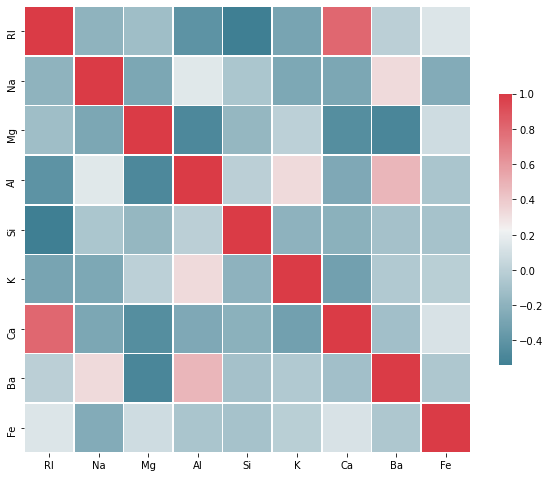

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### (b) Class Balance

- Plot a histogram of the target variable, the glass type.
- Are the classes well balanced?
- What is the risk of unbalanced classes and what can be done to improve the situation?


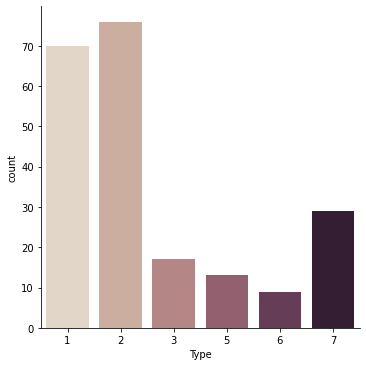

In [15]:
# enter your code here
sns.catplot(x="Type", kind="count", palette="ch:.25", data=df);

Answer:  Not really. Most machine learning classification algorithms are sensitive to unbalance in the predictor classes.

Undersampling:
We can randomly select a subset of samples for the classes with more instances. But then we can loose some important samples for our classification problem.

Oversampling: we duplicates just a smaples randomply from the classes with less instances. But in this case we run into a risk to overfit our model.

### (c) Test Train Split
- Split the data in 80% training and 20% test data.


In [16]:

Y = df["Type"].values
Y = Y.astype(float)
X = df.values

# enter your code here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


### (d) Scaling

- Scale the data using the `StandardScaler()` form `sklearn.preprocessing`.
- Train the `StandardScaler()` on the training data and apply it also to the test data.

In [33]:
from sklearn.preprocessing import StandardScaler

# enter your code here
Scaler=StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)


### (e) Linear Kernel
- Train a *Support Vector Classifier* (`SVC`) from `sklearn.svm` using a linear kernel with `C=0.1`.
- Print the *classification report* on the test data using `classification_report` from `sklearn.metrics`. 
- Print the *classification accuracy* on the test data.
- Print the *confusion matrix*

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# enter your code here
clf1 = SVC(kernel='linear', C=0.1)
clf1.fit(X_train_scaled, y_train)
y_pred = clf1.predict(X_test_scaled)

rep = classification_report(y_test, y_pred)

print ("Classification report")
print (rep)

acc = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc)

conf = confusion_matrix(y_test, y_pred)

print ("Confusion matrix")
print (conf)


Classification report
              precision    recall  f1-score   support

         1.0       0.58      1.00      0.73        11
         2.0       0.70      0.50      0.58        14
         3.0       0.00      0.00      0.00         3
         5.0       0.75      0.75      0.75         4
         6.0       1.00      0.33      0.50         3
         7.0       1.00      1.00      1.00         8

    accuracy                           0.70        43
   macro avg       0.67      0.60      0.59        43
weighted avg       0.70      0.70      0.67        43

Accuracy score:  0.6976744186046512
Confusion matrix
[[11  0  0  0  0  0]
 [ 7  7  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  1  1  1  0]
 [ 0  0  0  0  0  8]]


### (f) Support Vector Classifier (SVC) using Radial Basis function kernel (RBF)
- Train a Support Vector Classifier using a *Radial Basis Function kernel* (`RBF`) with `C=100` and `gamma=0.1`.
- Print the classification on the test data report using `classification_report` from `sklearn.metrics`. 
- Print the classification *accuracy* on the test data.
- Print the *confusion matrix*


In [35]:
# enter your code here
clf2 = SVC(kernel='rbf', C=100, gamma=0.1)
clf1.fit(X_train_scaled, y_train)
y_pred = clf1.predict(X_test_scaled)

rep = classification_report(y_test, y_pred)

print ("Classification report")
print (rep)

acc = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc)

conf = confusion_matrix(y_test, y_pred)

print ("Confusion matrix")
print (conf)


Classification report
              precision    recall  f1-score   support

         1.0       0.58      1.00      0.73        11
         2.0       0.70      0.50      0.58        14
         3.0       0.00      0.00      0.00         3
         5.0       0.75      0.75      0.75         4
         6.0       1.00      0.33      0.50         3
         7.0       1.00      1.00      1.00         8

    accuracy                           0.70        43
   macro avg       0.67      0.60      0.59        43
weighted avg       0.70      0.70      0.67        43

Accuracy score:  0.6976744186046512
Confusion matrix
[[11  0  0  0  0  0]
 [ 7  7  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  1  1  1  0]
 [ 0  0  0  0  0  8]]


### (g) 5-fold crossvalidated Grid Search
- Perform a 5-fold crossvalidated *grid search* over the parameters `C` and `gamma`. Use `GridSearchCV` form `sklearn.model_selection`
- Vary both parameters logarithmically in seven steps from $10^{-3}$ to $10^{+3}$.
- What are the optimum parameters for `gamma` and `C`?
- What is the *accuracy* of the best classifier on the test data?

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

C_range     = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid  = dict(gamma=gamma_range, C=C_range)

score = 'accuracy'

clf = GridSearchCV(SVC(C=1), param_grid, cv=5,
                   scoring=score)
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))


Best parameters set found on development set:

{'C': 1000.0, 'gamma': 0.001}

Grid scores on development set:

0.363 (+/-0.024) for {'C': 0.001, 'gamma': 0.001}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 0.01}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 0.1}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 1.0}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 10.0}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 100.0}
0.363 (+/-0.024) for {'C': 0.001, 'gamma': 1000.0}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 0.001}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 0.01}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 0.1}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 1.0}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 10.0}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 100.0}
0.363 (+/-0.024) for {'C': 0.01, 'gamma': 1000.0}
0.363 (+/-0.024) for {'C': 0.1, 'gamma': 0.001}
0.363 (+/-0.024) for {'C': 0.1, 'gamma': 0.01}
0.450 (+/-0.052) for {'C': 0.1, 'gamma': 0.1}
0.462 (+/-0.023) for {'C': 0.1, 'gamma': 1.0}
0.363 (+/-0.024) fo

### Plot the confusion matrix of the best estimator

- Print the classification *accuracy* on the test data.
- Print the *confusion matrix*

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# enter your code here
y_pred = clf.best_estimator_.predict(X_test_scaled)

rep = classification_report(y_test, y_pred)

print ("Classification report")
print (rep)

acc = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc)

conf = confusion_matrix(y_test, y_pred)

print ("Confusion matrix")
print (conf)

Classification report
              precision    recall  f1-score   support

         1.0       0.50      1.00      0.67        11
         2.0       0.50      0.21      0.30        14
         3.0       0.00      0.00      0.00         3
         5.0       0.80      1.00      0.89         4
         6.0       1.00      0.67      0.80         3
         7.0       1.00      1.00      1.00         8

    accuracy                           0.65        43
   macro avg       0.63      0.65      0.61        43
weighted avg       0.62      0.65      0.59        43

Accuracy score:  0.6511627906976745
Confusion matrix
[[11  0  0  0  0  0]
 [11  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  0  8]]


C:\Users\dmitri.grigoriev\Anaconda3\envs\Machine Learning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 